<a href="https://colab.research.google.com/github/bsekiewicz/course-deepdrive-image-classification/blob/main/homework/02-module/02_homework_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import os

# Wybierz 10 klas

Poniżej przygotuj listę 10 klas z:
https://quickdraw.withgoogle.com/data

> nazwy takie jak nazwy obiektów (wyświetlane po najechaniu lub kliknięciu)

In [4]:
class_names=[
  'bread',
  'cake',
  'donut',
  'onion',
  'pizza',
  'steak',
  'grapes',
  'ice cream',
  'carrot',
  'banana',
]

## Test

In [5]:
assert len(class_names)==10, 'Nazw powinno być dokładnie 10'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Każda z nazw powinna być typu str'
    assert '/' not in class_names[i], 'Same nazwy klas, ze spacjami, bez ukośników'

# Wczytanie danych
Pobieranie plików z obrazami w formaci npy (numpy)

In [6]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bread.npy ==> bread.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cake.npy ==> cake.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/donut.npy ==> donut.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/onion.npy ==> onion.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pizza.npy ==> pizza.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/steak.npy ==> steak.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy ==> grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ice%20cream.npy ==> ice cream.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/carrot.npy ==> carrot.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy ==> banana.npy


## Wczytywanie z plików .npy
Dane znajdziesz w tablicy data

In [7]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

bread           <class 'numpy.ndarray'>
cake            <class 'numpy.ndarray'>
donut           <class 'numpy.ndarray'>
onion           <class 'numpy.ndarray'>
pizza           <class 'numpy.ndarray'>
steak           <class 'numpy.ndarray'>
grapes          <class 'numpy.ndarray'>
ice cream       <class 'numpy.ndarray'>
carrot          <class 'numpy.ndarray'>
banana          <class 'numpy.ndarray'>


# Liczebności i wymiary zdjęć
Wypisz nazwę i shape dla każdej klasy

In [8]:
data_name_shape = {}
for name in class_names:
    file_name = name+'.npy'
    data_name_shape[name] = np.load(file_name, fix_imports=True, allow_pickle=True).shape
    print('%-15s'%name, data_name_shape[name])

bread           (120570, 784)
cake            (124905, 784)
donut           (140751, 784)
onion           (132297, 784)
pizza           (130371, 784)
steak           (122042, 784)
grapes          (155305, 784)
ice cream       (123133, 784)
carrot          (132459, 784)
banana          (307936, 784)


Poniżej zwizualizuj liczbę zdjęć per klasę:

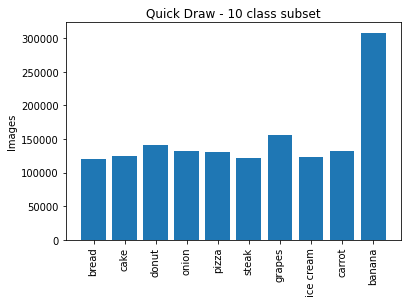

In [9]:
height = data_name_shape.keys()
bars = [x[0] for x in data_name_shape.values()]

plt.bar(height, bars)
plt.title('Quick Draw - 10 class subset')
plt.xticks(rotation=90)
plt.ylabel('Images')

plt.show()

# Wizualizacja danych
Dane są w macierzach dwuwyamirowych,
aby je poprawnie wyświetlić jako obraz,
należy je przekonwertować do 3 wymiarów:

- numer zdjęcia
- wysokość
- szerokość

Tu pomoże `reshape` z numpy.

## Konwersja do (-1, 28, 28)

In [10]:
data_reshaped = list(map(lambda x: x.reshape(-1,28,28), data))

In [12]:
# test
data_reshaped[0].shape, data_reshaped[0][0].shape

((120570, 28, 28), (28, 28))

Wyświetl po jednym przykładzie z każdej klasy.

Możesz skorzystać z `plt.subplot`

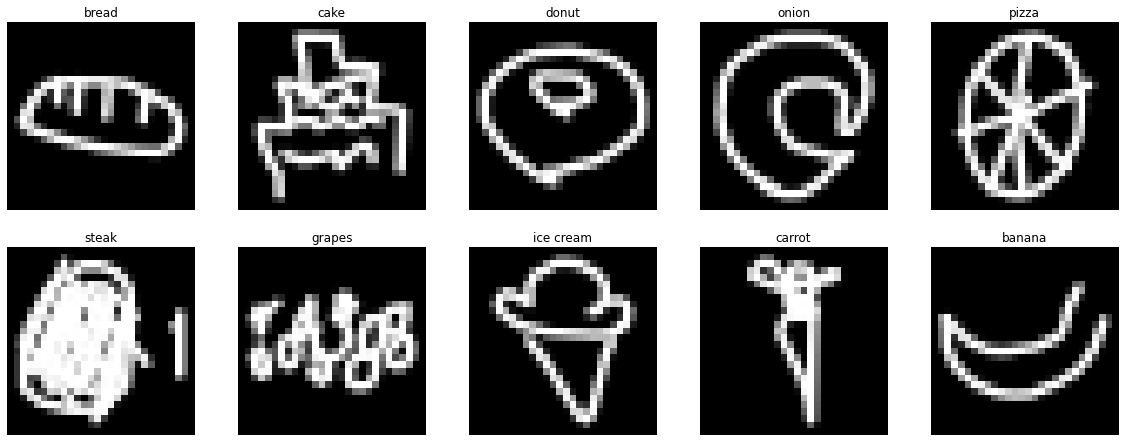

In [47]:
plt.figure(figsize=(20,20))
for i in range(len(data_reshaped)):
   plt.subplot(5, 5, i+1)
   plt.title(class_names[i])
   plt.imshow(data_reshaped[i][8], cmap='gray')
   plt.axis('off')

## Obraz średni
Jak podobne do siebie są obrazy z poszczególnych klas?

Oblicz i wyświetl średni obraz dla wszystkich klas.

Możesz skorzystać z `np.mean`

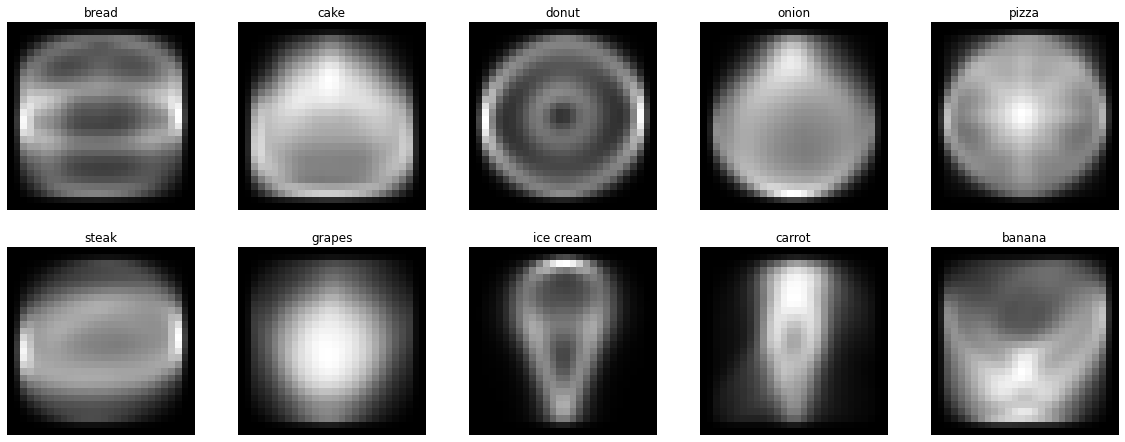

In [55]:
plt.figure(figsize=(20,20))
for i in range(len(data_reshaped)):
   plt.subplot(5, 5, i+1)
   plt.title(class_names[i])
   plt.imshow(data_reshaped[i].mean(axis=0), cmap='gray')
   plt.axis('off')